# Extraction of nearest TSS

In [1]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pybedtools
from pyfaidx import Fasta
from Bio import SeqIO
from Bio.SeqUtils import GC
mpl.rcParams['figure.dpi']= 100

In [26]:
mm_fasta = pybedtools.BedTool('data/GRCm38.p6.genome.fa')
iap_bed = pybedtools.BedTool('data/clean/mm10.IAP.mended.extent.bed')
tss_bed = pybedtools.BedTool('data/clean/tss.bed')

In [27]:
iap_df = iap_bed.to_dataframe()
print(iap_bed.count())
iap_df

10633


,chrom,start,end,name,score,strand
0,chr1,95057294,95057326,151177,33,-
1,chr1,20055335,20055371,25136,37,-
2,chr1,100567693,100567739,159399,47,+
3,chr1,100931364,100931413,160006,50,+
4,chr1,60586644,60586694,91370,51,-
...,...,...,...,...,...,...
10628,chrY,78114612,78126000,4625352,11389,+
10629,chrY,68871130,68886597,4610940,15468,-
10630,chrY,76707764,76723231,4623137,15468,+
10631,chrY,48802527,48818126,4581271,15600,+


In [39]:
genes_dist_bed = iap_bed.sort().closest(tss_bed.sort(), D="b", t="first")

In [44]:
names = ["chrom", "start", "end", "element_id", 
         "length", "strand", "gene1", "gene2", "gene3", "gene4",
         "gene5", "gene6", "gene7", "gene8", "gene9", "gene10",
         "gene11", "gene12", "tss_dist"]
genes_dist_df = genes_dist_bed.to_dataframe(names=names)
genes_dist_df = genes_dist_df.drop(columns=["gene1", "gene2", "gene3", "gene4",
                                            "gene5", "gene6", "gene7", "gene8",
                                            "gene9", "gene10", "gene11", "gene12"])

genes_dist_df

,chrom,start,end,element_id,length,strand,tss_dist
0,chr1,3031358,3031710,28,353,-,182772
1,chr1,3143092,3148151,182,5060,-,66331
2,chr1,3997836,3998160,1272,325,-,121706
3,chr1,4132179,4132516,1427,338,-,0
4,chr1,4556987,4559597,1976,2611,-,-59634
...,...,...,...,...,...,...,...
10628,chrY,90569911,90574359,4644718,4449,-,-38277
10629,chrY,90583921,90584222,4644724,302,+,-52287
10630,chrY,90667602,90667783,4644849,182,-,83357
10631,chrY,90702165,90703909,4644891,1745,+,47231


In [80]:
tss_bins = [-500000, 0, 500000]
genes_dist_df["position"] = pd.cut(genes_dist_df["tss_dist"], tss_bins, labels=["upstream", "downstream"])
print(pd.cut(genes_dist_df["tss_dist"], bins).value_counts())
genes_dist_df

(-500000, 0]    5441
(0, 500000]     4039
Name: tss_dist, dtype: int64


,chrom,start,end,element_id,length,strand,tss_dist,position
0,chr1,3031358,3031710,28,353,-,182772,downstream
1,chr1,3143092,3148151,182,5060,-,66331,downstream
2,chr1,3997836,3998160,1272,325,-,121706,downstream
3,chr1,4132179,4132516,1427,338,-,0,upstream
4,chr1,4556987,4559597,1976,2611,-,-59634,upstream
...,...,...,...,...,...,...,...,...
10628,chrY,90569911,90574359,4644718,4449,-,-38277,upstream
10629,chrY,90583921,90584222,4644724,302,+,-52287,upstream
10630,chrY,90667602,90667783,4644849,182,-,83357,downstream
10631,chrY,90702165,90703909,4644891,1745,+,47231,downstream


In [81]:
len_bins = [0, 700, 50000]
genes_dist_df["status"] = pd.cut(genes_dist_df["length"], len_bins, labels=["solo", "int"])
print(pd.cut(genes_dist_df["length"], bins).value_counts())
genes_dist_df

(0, 500000]     10633
(-500000, 0]        0
Name: length, dtype: int64


,chrom,start,end,element_id,length,strand,tss_dist,position,status
0,chr1,3031358,3031710,28,353,-,182772,downstream,solo
1,chr1,3143092,3148151,182,5060,-,66331,downstream,int
2,chr1,3997836,3998160,1272,325,-,121706,downstream,solo
3,chr1,4132179,4132516,1427,338,-,0,upstream,solo
4,chr1,4556987,4559597,1976,2611,-,-59634,upstream,int
...,...,...,...,...,...,...,...,...,...
10628,chrY,90569911,90574359,4644718,4449,-,-38277,upstream,int
10629,chrY,90583921,90584222,4644724,302,+,-52287,upstream,solo
10630,chrY,90667602,90667783,4644849,182,-,83357,downstream,solo
10631,chrY,90702165,90703909,4644891,1745,+,47231,downstream,int


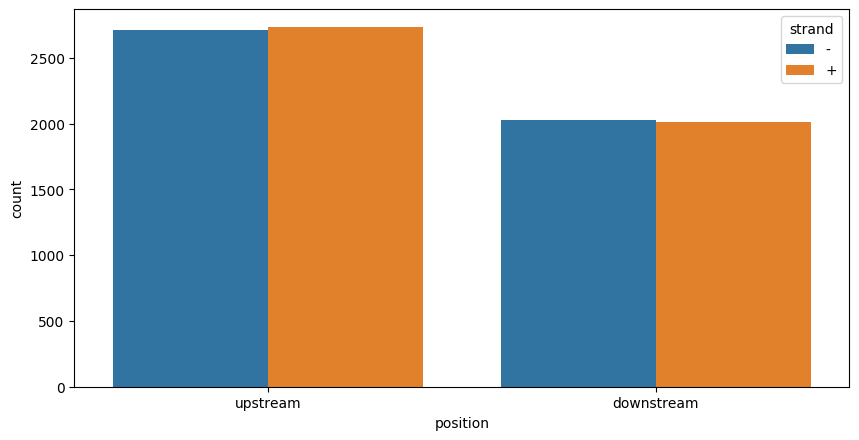

In [79]:
sns.countplot(x="position", hue="strand", data=genes_dist_df)

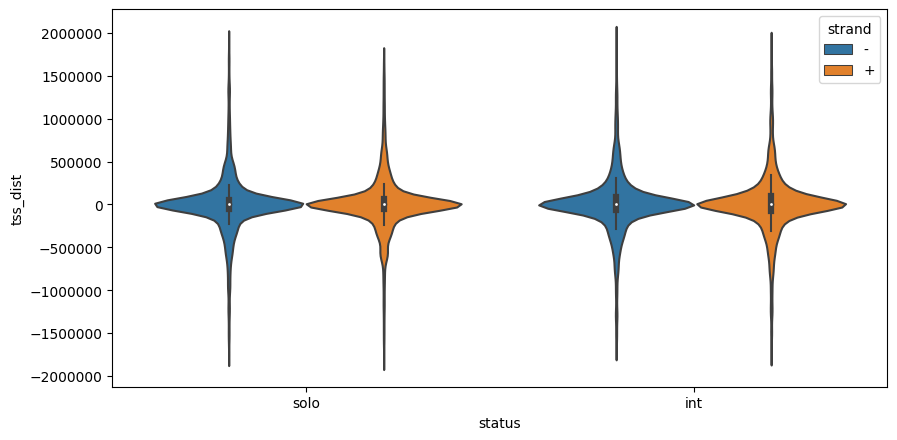

In [85]:
sns.violinplot(x="status", y="tss_dist", hue="strand", data=genes_dist_df)

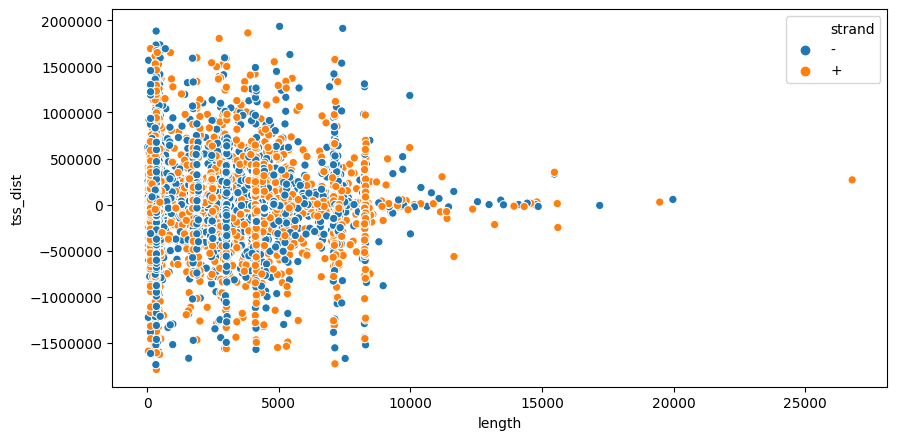

In [55]:
plt.rcParams["figure.figsize"] =(10,5) 
sns.scatterplot(x="length", y="tss_dist", hue="strand", data=genes_dist_df)

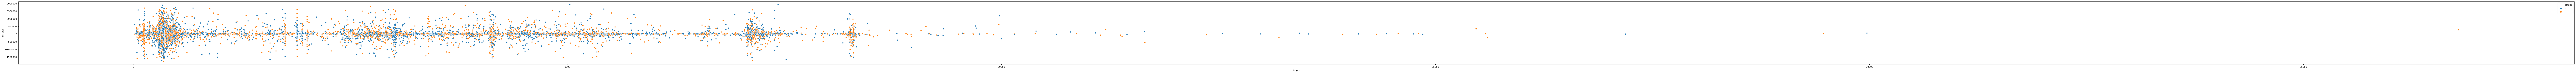

In [54]:
plt.rcParams["figure.figsize"] =(200,5) 
sns.scatterplot(x="length", y="tss_dist", hue="strand", data=genes_dist_df)